SARCASM DETECTOR

Sarcasm is a type of phenomenon with specific perlocutionary effects on the hearer, such as to break their pattern of expectation

https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
# from sklearn.model_selection import train_test_split

print('hreresdsdsdsdsde')

hreresdsdsdsdsde


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
from sklearn.metrics import classification_report, confusion_matrix

2023-10-27 01:16:21.756037: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-27 01:16:24.855882: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-27 01:16:24.857066: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 01:16:29.818612: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data1 = pd.read_csv('Sarcasm data1.csv')
data2 = pd.read_csv('Sarcasm data2.csv')
data = pd.concat([data1, data2], ignore_index=True)

In [4]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55328 entries, 0 to 55327
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  55328 non-null  object
 1   headline      55328 non-null  object
 2   is_sarcastic  55328 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


Data Preprocessing

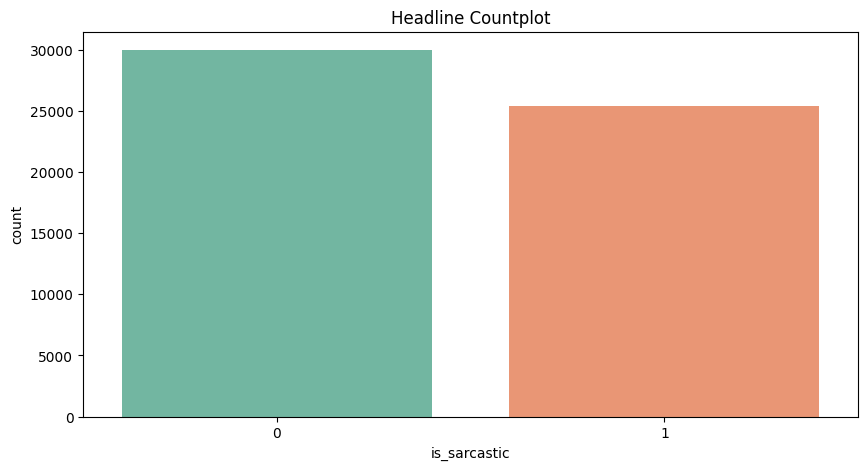

In [6]:
#checking the balance in the dataset
#check number of headlines by is_sarcastic
plt.figure(figsize=(10, 5))
sns.countplot(x='is_sarcastic', data=data, palette="Set2").set_title("Headline Countplot")
plt.show()

Data Cleaning

In [7]:
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/ronka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#writing the cleaing function using 'r'egular 'e'xpressions

def clean_text(sentences):
    #convert all to lowercase
    text = sentences.lower()

    #remove text in []
    text = re.sub('\[.*?\]', '', text)

    #removing punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    #removing digits words
    text = re.sub('\w*\d\w*', '', text)

    #joining words
    text = ' '.join([word for word in text.split() if word not in stopwords_list])

    return text

In [9]:
data['headline'].iloc[4]

'j.k. rowling wishes snape happy birthday in the most magical way'

In [10]:
clean_text(data['headline'].iloc[4])

'jk rowling wishes snape happy birthday magical way'

In [11]:
#adding new column
data['cleaned'] = data['headline'].map(clean_text)

In [12]:
data.head()

,article_link,headline,is_sarcastic,cleaned
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,former versace store clerk sues secret black c...
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catches thorny political mood...
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,mom starting fear sons web series closest thin...
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,boehner wants wife listen come alternative deb...
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,jk rowling wishes snape happy birthday magical...


Wordcloud

In [13]:
#combining all sarcastic headlines for wordcloud
combined_sarcastic = ' '.join(data['cleaned'][data['is_sarcastic'] == 1].to_list())

In [14]:
combined_sarcastic

'mom starting fear sons web series closest thing grandchild boehner wants wife listen come alternative debtreduction ideas top snake handler leaves sinking huckabee campaign nuclear bomb detonates rehearsal spiderman musical cosby lawyer asks accusers didnt come forward smeared legal team years ago stock analysts confused frightened boar market courtroom sketch artist clear manga influences trump assures nation decision syrian airstrikes came carefully considering passing whims excon back behind bar careful consideration bush recommends oil drilling giant altoid heading toward earth robin williams inflicted holiday moviegoers eighth straight year rescuers heroically help beached garbage back ocean christian bale visits sikh temple victims right live life complete stunned horror added constitution nasa almost positive mars rocky monster undeterred nightlight longtime teacher retires without changing single students life new star wars film disappoints diehard nien nunb fans bats shooed n

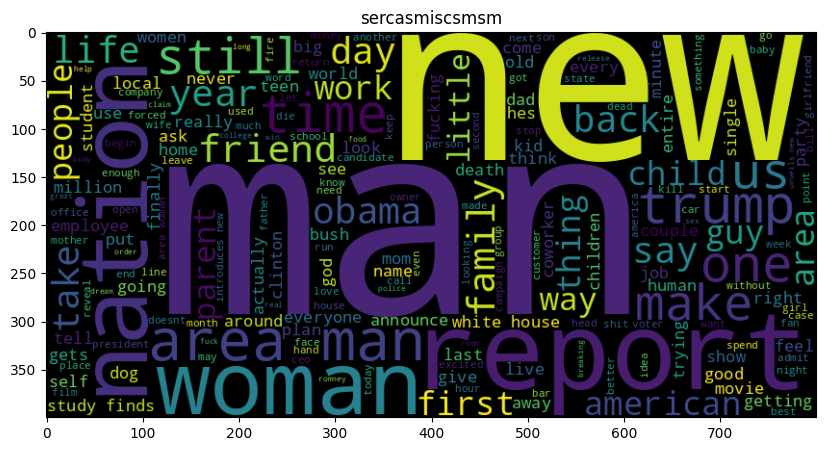

In [15]:
wc = WordCloud(width=800, height=400, background_color="black").generate(combined_sarcastic)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear') #QQQQQQQQQQQQQQQQQQQ
plt.title("sercasmiscsmsm")
plt.show()

In [16]:
#doing the same for non sarcastic
combined_not_sarcastic = ' '.join(data['cleaned'][data['is_sarcastic'] == 0].to_list())

In [17]:
combined_not_sarcastic

'former versace store clerk sues secret black code minority shoppers roseanne revival catches thorny political mood better worse jk rowling wishes snape happy birthday magical way advancing worlds women fascinating case eating labgrown meat ceo send kids school work company fridays morning email inside trumps presser ages airline passengers tackle man rushes cockpit bomb threat facebook reportedly working healthcare features apps north korea praises trump urges us voters reject dull hillary actually cnns jeffrey lord indefensible barcelona holds huge protest support refugees bloombergs program build better cities got bigger craig hicks indicted qatar deporting dutch woman reported drugged raped shouldnt go circus ted cruz hits panic button could lose houses congress writers must plan surprised obama visits arlington national cemetery honor veterans remembrance beginning task allies islamist motive killing nemtsov nonsense gillian jacobs like kiss adam brody uber vows repay nyc drivers 

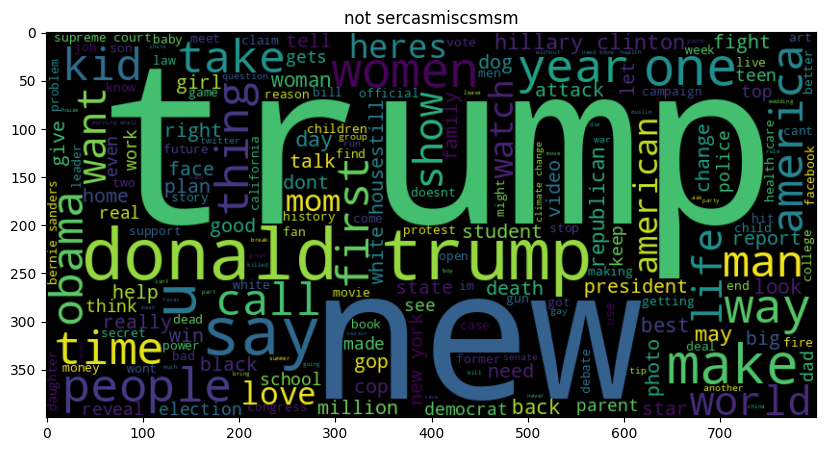

In [18]:
wc = WordCloud(width=800, height=400, background_color="black").generate(combined_not_sarcastic)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear') #QQQQQQQQQQQQQQQQQQQ
plt.title("not sercasmiscsmsm")
plt.show()

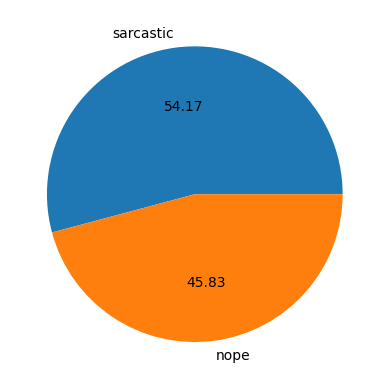

In [19]:
plt.pie(data['is_sarcastic'].value_counts(), labels=['sarcastic', 'nope'], autopct="%0.2f")
plt.show()

#conclusion: data is kinda balanced

In [20]:
text = data['cleaned'].to_list()
label = data['is_sarcastic'].to_list()

In [21]:
#train :test: validation ::: 80: 10: 10
train_portion = .8
train_size = int(len(text) * train_portion)

#training dataset
train_text = text[:train_size]# This will contain the first 800 items (0-799) from the 'text' list
train_label = label[:train_size]# Similarly for labels

#validation dataset
val_size = train_size + int((len(text) - train_size)/2)
val_text = text[train_size:val_size]# This will contain items 800-899 from the 'text' list
val_label = label[train_size:val_size]# Similarly for labels

#testing dataset
test_text = text[val_size:]# This will contain the remaining items (900-999) from the 'text' list
test_label = label[val_size:]# Similarly for labels

![Alt text](image.png)

In [22]:
print('Training:', len(train_text), len(train_label))
print('Validation:', len(val_text), len(val_label))
print('Testing:', len(test_text), len(test_label))

Training: 44262 44262
Validation: 5533 5533
Testing: 5533 5533


In [23]:
#setting paramenters
#QQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ
#maximum length of unique words
vocab_size = 10000

#embedding dimension value
embedding_dim = 200

#maximum lenght of sentence
max_length = 60

#padding sequence
padding_type = 'post'

#unknown words: OOV tokens are out of vocabulary tokens used to replace unknown words
oov_tok = '<OOV>'

In [24]:
#tokenization
# Create a tokenizer with a specified vocabulary size and out-of-vocabulary token
tokenizer = Tokenizer(num_words= vocab_size, oov_token=oov_tok)
# Fit the tokenizer on the training text data to create word-to-index mapping
tokenizer.fit_on_texts(train_text)

In [25]:
#words with lower occurences get lower word count
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'new': 2,
 'man': 3,
 'trump': 4,
 'us': 5,
 'report': 6,
 'one': 7,
 'area': 8,
 'woman': 9,
 'donald': 10,
 'says': 11,
 'day': 12,
 'like': 13,
 'get': 14,
 'first': 15,
 'time': 16,
 'people': 17,
 'trumps': 18,
 'obama': 19,
 'house': 20,
 'life': 21,
 'still': 22,
 'make': 23,
 'white': 24,
 'women': 25,
 'back': 26,
 'clinton': 27,
 'world': 28,
 'could': 29,
 'years': 30,
 'family': 31,
 'americans': 32,
 'way': 33,
 'study': 34,
 'black': 35,
 'gop': 36,
 'bill': 37,
 'would': 38,
 'best': 39,
 'cant': 40,
 'really': 41,
 'police': 42,
 'american': 43,
 'watch': 44,
 'show': 45,
 'school': 46,
 'know': 47,
 'home': 48,
 'good': 49,
 'nation': 50,
 'going': 51,
 'finds': 52,
 'say': 53,
 'things': 54,
 'president': 55,
 'death': 56,
 'video': 57,
 'last': 58,
 'love': 59,
 'parents': 60,
 'year': 61,
 'mom': 62,
 'big': 63,
 'state': 64,
 'health': 65,
 'hillary': 66,
 'every': 67,
 'kids': 68,
 'need': 69,
 'getting': 70,
 'may': 71,
 'gets': 72,
 'campaign': 73,

In [26]:
# Convert training text to sequences of word indices
tokenizer.texts_to_sequences(train_text[:5])

[[204, 1, 740, 2953, 2235, 245, 35, 1958, 2515, 8487],
 [8488, 3234, 2422, 8489, 289, 3081, 151, 853],
 [62, 597, 719, 1063, 1840, 496, 4199, 116, 9676],
 [1320, 130, 337, 1439, 219, 3385, 1, 703],
 [4779, 5143, 679, 1, 454, 490, 1137, 33]]

In [27]:
#padding them to a uniform length input

#converting training text to sequences of word indices
train_indices = tokenizer.texts_to_sequences(train_text)
#pad sequences to a fixed length
train_padded = pad_sequences(train_indices, padding=padding_type, maxlen=max_length)

#will take the length of the longest one and then pad them the same length with zeros

In [28]:
print(train_padded[0])
print(train_padded.shape)

[ 204    1  740 2953 2235  245   35 1958 2515 8487    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
(44262, 60)


In [29]:
# convert validation text to sequences of word indices
val_indices = tokenizer.texts_to_sequences(val_text)

# Pad sequences to a fixed length
validation_padded = pad_sequences(val_indices, padding=padding_type, maxlen=max_length)

# Convert test text to sequences of word indices
test_indices = tokenizer.texts_to_sequences(test_text)
# Pad sequences to a fixed length
test_padded = pad_sequences(test_indices, padding=padding_type, maxlen=max_length)

# Check
print('Training vector :', train_padded.shape)
print('Validations vector :', validation_padded.shape)
print('Testing vector :', test_padded.shape)


Training vector : (44262, 60)
Validations vector : (5533, 60)
Testing vector : (5533, 60)


In [30]:
# Decode the sample training vector
tokenizer.sequences_to_texts([train_padded[145].tolist()])


['elizabeth warren calls donald trump racist bully <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']

In [31]:
# Prepare labels for model
training_labels_final = np.array(train_label)
validation_labels_final = np.array(val_label)
testing_labels_final = np.array(test_label)


# Check shapes
print('Training vector :', training_labels_final.shape)
print('Validations vector :', validation_labels_final.shape)
print('Testing vector :', testing_labels_final.shape)


Training vector : (44262,)
Validations vector : (5533,)
Testing vector : (5533,)


Building Model

In [32]:
# import the TensorFlow library
import tensorflow as tf

# define a sequential neural network model
model = tf.keras.Sequential([
	# embedding layer for creating word embeddings
	tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

	# GlobalMaxPooling layer to extract relevant features
	tf.keras.layers.GlobalMaxPool1D(),

	# first Dense layer with 40 neurons and ReLU activation
	tf.keras.layers.Dense(40, activation='relu'),
    # Rectified Linear Unit s a fundamental activation function in neural networks 
	# that introduces non-linearity, sparsity, and efficiency to the model.

	# Dropout layer to prevent overfitting
	tf.keras.layers.Dropout(0.5),

	# Second Dense layer with 20 neurons and ReLU activation
	tf.keras.layers.Dense(20, activation='relu'),

	# Dropout layer to prevent overfitting
	tf.keras.layers.Dropout(0.5),

	# Third Dense layer with 10 neurons and ReLU activation
	tf.keras.layers.Dense(10, activation='relu'),

	# Dropout layer to prevent overfitting
	tf.keras.layers.Dropout(0.2),

	# Final Dense layer with 1 neuron and sigmoid activation for binary classification
	tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()


2023-10-27 01:16:53.991412: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-27 01:16:53.992760: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 200)           2000000   
                                                                 
 global_max_pooling1d (Glob  (None, 200)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 40)                8040      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                        

In [33]:
# Compile the model with specified loss function, optimizer, and evaluation metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Binary cross entropy (also known as logarithmic loss or log loss) is a model metric that 
# tracks incorrect labeling of the data class by a model, penalizing the model if deviations 
# in probability occur into classifying the labels. Low log loss 
# values equate to high accuracy values. Binary cross entropy is equal to -1*log(likelihood).

In [34]:
# Set the number of training epochs
num_epochs = 5

# Fit the model to the training data and validate on the validation data
history = model.fit(train_padded, training_labels_final, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_labels_final)
)


Epoch 1/5
1384/1384 [==============================] - 39s 26ms/step - loss: 0.5269 - accuracy: 0.7245 - val_loss: 0.2966 - val_accuracy: 0.8773
Epoch 2/5
1384/1384 [==============================] - 36s 26ms/step - loss: 0.2464 - accuracy: 0.9105 - val_loss: 0.1673 - val_accuracy: 0.9333
Epoch 3/5
1384/1384 [==============================] - 39s 28ms/step - loss: 0.1156 - accuracy: 0.9624 - val_loss: 0.0983 - val_accuracy: 0.9680
Epoch 4/5
1384/1384 [==============================] - 33s 24ms/step - loss: 0.0509 - accuracy: 0.9850 - val_loss: 0.0912 - val_accuracy: 0.9787
Epoch 5/5
1384/1384 [==============================] - 33s 24ms/step - loss: 0.0252 - accuracy: 0.9927 - val_loss: 0.1100 - val_accuracy: 0.9812


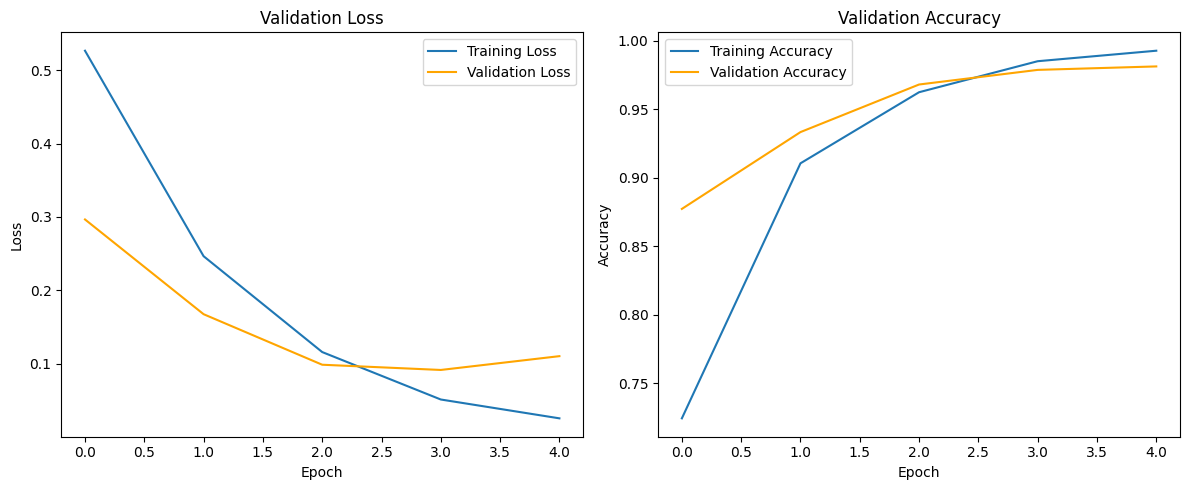

In [35]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss',color='orange')
ax1.set_title('Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
ax2.set_title('Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [36]:
#evaluating loss and accuray of the model
loss, accuracy = model.evaluate(test_padded,testing_labels_final)
print(f'Accurcy on test dataset :{round(accuracy*100,2)}%')


173/173 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9814
Accurcy on test dataset :98.14%


In [37]:
#predicting the model 

pred_prob = model.predict(test_padded)
pred_label = [1 if prob >= 0.5 else 0 for prob in pred_prob]
pred_label[:5]


173/173 [==============================] - 0s 2ms/step


[1, 1, 1, 1, 0]

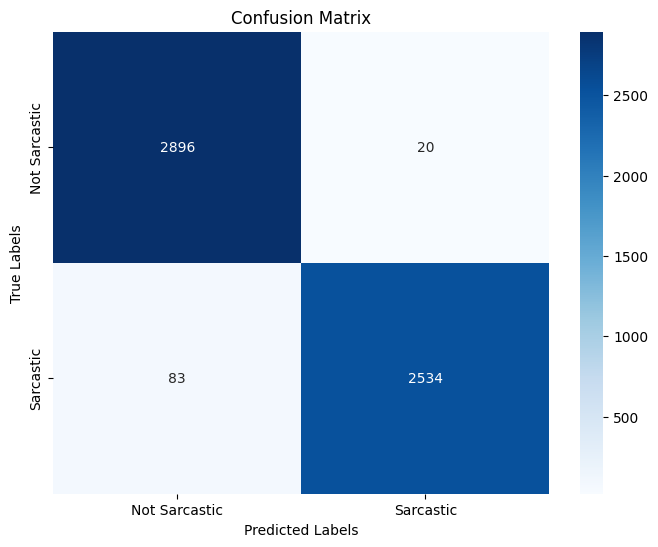

In [38]:
# Compute confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(testing_labels_final, pred_label)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
			xticklabels=['Not Sarcastic', 'Sarcastic'],
			yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [39]:
# Print Classification Report
print("\nClassification Report:")
print(classification_report(testing_labels_final, pred_label,
							target_names=['Not Sarcastic', 'Sarcastic']))



Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.97      0.99      0.98      2916
    Sarcastic       0.99      0.97      0.98      2617

     accuracy                           0.98      5533
    macro avg       0.98      0.98      0.98      5533
 weighted avg       0.98      0.98      0.98      5533



In [41]:
while True:
	# Prompt the user to input a headline or exit
	user_input = input(
		"Enter a headline for prediction (or type 'exit' to quit): ")

	# Check if the user wants to exit
	if user_input.lower() == 'exit':
		break

	# Clean and preprocess user input
	cleaned_input = clean_text(user_input)
	tokenized_input = tokenizer.texts_to_sequences(
		[cleaned_input]) # Tokenize the cleaned text
	padded_input = pad_sequences(
		tokenized_input, maxlen=max_length, padding=padding_type) # Pad the tokenized text

	# Predict sarcasm
	prediction = model.predict(padded_input)

	# Print the prediction result
	print(prediction)
	if prediction >= 0.5:
		print(f"Headline: {user_input}\nPrediction: Sarcastic")
	else:
		print(f"Headline: {user_input}\nPrediction: Not Sarcastic")


1/1 [==============================] - 0s 18ms/step
[[0.9999996]]
Headline: osama is the greatest man to ever live
Prediction: Sarcastic
1/1 [==============================] - 0s 19ms/step
[[0.10921989]]
Headline: I am going home
Prediction: Not Sarcastic
1/1 [==============================] - 0s 21ms/step
[[0.9999998]]
Headline: I am going to the mall
Prediction: Sarcastic


https://www.geeksforgeeks.org/sarcasm-detection-using-neural-networks/